In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("moscow_apartment_listings.csv")
df.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel


In [4]:
del df['AO']

In [5]:
del df['hm']

In [7]:
del df['h3']

In [8]:
df

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,agent_offers,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,1,5,1.0,1,39.4,11,12,0,0
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,1,9,1.0,1,35.6,2,9,0,0
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,57,9,2.0,2,53.0,5,12,0,0
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,292,5,1.0,2,44.1,8,9,0,0
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,292,5,1.0,2,44.2,6,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,8700000,2,0,47,135,423,2.0,55.813536,37.470033,11088,1,1,1.0,1,36.2,2,17,0,0
12177,9450000,2,0,31,135,581,2.0,55.809024,37.475441,11088,1,2,1.0,1,38.3,6,22,0,0
12178,19000000,4,0,19,135,842,2.0,55.817794,37.464824,11088,1,2,1.0,1,55.8,11,17,0,0
12179,16900000,1,0,19,135,842,2.0,55.817794,37.464824,11088,1,1,1.0,2,62.0,15,17,0,0


In [9]:
df.isnull().sum()

price                    0
repair                   0
year_built_empty         0
house_age                0
closest_subway           0
dist_to_subway           0
sg                       0
lat                      0
lon                      0
subway_dist_to_center    0
agent_offers             0
subway_offers            0
address_offers           0
rooms                    0
footage                  0
floor                    0
max_floor                0
first_floor              0
last_floor               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  12181 non-null  int64  
 1   repair                 12181 non-null  int64  
 2   year_built_empty       12181 non-null  int64  
 3   house_age              12181 non-null  int64  
 4   closest_subway         12181 non-null  int64  
 5   dist_to_subway         12181 non-null  int64  
 6   sg                     12181 non-null  float64
 7   lat                    12181 non-null  float64
 8   lon                    12181 non-null  float64
 9   subway_dist_to_center  12181 non-null  int64  
 10  agent_offers           12181 non-null  int64  
 11  subway_offers          12181 non-null  int64  
 12  address_offers         12181 non-null  float64
 13  rooms                  12181 non-null  int64  
 14  footage                12181 non-null  float64
 15  fl

In [33]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X

,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,agent_offers,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor
0,3,0,42,59,960,0.0,55.609009,37.734632,17166,1,5,1.0,1,39.4,11,12,0,0
1,2,0,43,59,802,0.0,55.608760,37.741936,17166,1,9,1.0,1,35.6,2,9,0,0
2,2,0,43,59,638,0.0,55.610207,37.742495,17166,57,9,2.0,2,53.0,5,12,0,0
3,2,0,43,59,929,0.0,55.624017,37.740373,17166,292,5,1.0,2,44.1,8,9,0,0
4,2,0,43,59,785,0.0,55.609107,37.740430,17166,292,5,1.0,2,44.2,6,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12176,2,0,47,135,423,2.0,55.813536,37.470033,11088,1,1,1.0,1,36.2,2,17,0,0
12177,2,0,31,135,581,2.0,55.809024,37.475441,11088,1,2,1.0,1,38.3,6,22,0,0
12178,4,0,19,135,842,2.0,55.817794,37.464824,11088,1,2,1.0,1,55.8,11,17,0,0
12179,1,0,19,135,842,2.0,55.817794,37.464824,11088,1,1,1.0,2,62.0,15,17,0,0


In [34]:
y

0         8000000
1         7200000
2        10300000
3         8500000
4         9000000
           ...   
12176     8700000
12177     9450000
12178    19000000
12179    16900000
12180    17330000
Name: price, Length: 12181, dtype: int64

In [35]:
# Feature scaling fitting to the Model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [36]:
#splitting into train and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [37]:
#importing the model and metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [38]:
# selecting K value

mse = []
r2 = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i = r2_score(y_test,y_pred)
    r2.append(r2_i)
#     print('i = {}, mse = {} , r2 = {}'.format(i,mse_i,r2_i))

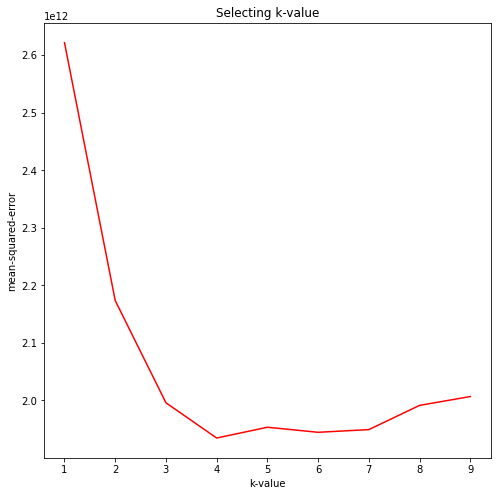

In [39]:
plt.figure(figsize = (8,8))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()


In [54]:
# Model building here
# so we'll choose K value = 4 as because there's Minimum MSE here

model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [55]:
# Model Evaluation here

r2_score(y_test,y_pred)


0.7862839459746461